In [1]:
import pandas  as pd
import os
from sklearn.metrics import classification_report

In [2]:
working_dir =  '../../../../data/annotation_consistency/human_kidney/'
misclassifed_spots = 'usually_misclassifed.csv'
gt_file = 'PathologistAnnotations.csv'
final_corrected_annotation = "corrected_annotations.csv"
accepted_annotation = "correctly_classified.csv"
annotation_fix = "Annotation_Fix.csv"

In [3]:
# read the data
misclassifed_df = pd.read_csv(os.path.join(working_dir, misclassifed_spots), index_col=0)
gt_df = pd.read_csv(os.path.join(working_dir, gt_file), index_col=0)
accepted_df = pd.read_csv(os.path.join(working_dir, accepted_annotation), index_col=0)
annotation_fix_df = pd.read_csv(os.path.join(working_dir, annotation_fix), index_col=0)

final_corrected_df = pd.read_csv(os.path.join(working_dir, final_corrected_annotation), index_col=0)


In [4]:
misclassifed_df

,Model Prediction,Current Pathologist Annotations
Barcode,,
AACAATGTGCTCCGAG-1,Tubules,mixed_1_tubules_interstitium
AACCAAGACCAACTGA-1,exclude,Tubules
AACCATAGATTCTGGC-1,Tubules,exclude
AACGACCGCTTGCGGT-1,Interstitium_fibrosis_inflammation,Interstitium
AACGGCCGTACTTCCT-1,Tubules,mixed_1_tubules_interstitium
...,...,...
TGTCCATGTATTCGCC-1,Glomeruli,mixed_2_glomeruli_interstitium
TGTCTTACAAGCCTTC-1,mixed_1_tubules_interstitium,Tubules
TGTTATGTACGCATAC-1,mixed_2_glomeruli_interstitium,mixed_1_tubules_interstitium


In [5]:
accepted_df

,Accepted Predictions
Barcode,
AACAATGTGCTCCGAG-1,Tubules
AACCAAGACCAACTGA-1,exclude
AACCATAGATTCTGGC-1,Tubules
AACGACCGCTTGCGGT-1,Interstitium_fibrosis_inflammation
AACGGCCGTACTTCCT-1,Tubules
...,...
TGTAATCTAACATTCG-1,Tubules
TGTATGATCGTTAACC-1,Tubules
TGTCAGGTCGGCCAGC-1,Interstitium_fibrosis_inflammation


In [6]:
annotation_fix_df

,Annotation_Fix
Barcode,
AAGCACTAAGAAGGAG-1,mixed_3_glomeruli_tubuli_interstitium
AGGAATCCGATGGTAT-1,Interstitium_fibrosis_inflammation
AGGATACCTATTGGAA-1,Interstitium_fibrosis_inflammation
ATAACTCGAAGTCCGC-1,mixed_3_glomeruli_tubuli_interstitium
ATCAAGGAACGCATCG-1,mixed_1_tubules_interstitium
CACTCAGTCCAGCGGA-1,exclude
CATTCTGTCTGCACTG-1,Interstitium_fibrosis_inflammation
CCGACAATTGCAACAG-1,Interstitium_fibrosis_inflammation
CCTAACAGTTATAGGA-1,mixed_3_glomeruli_tubuli_interstitium


In [8]:
# do some sanity checks
print(len(misclassifed_df))
print(len(gt_df))
print(len(accepted_df))
print(len(annotation_fix_df))
print(len(final_corrected_df))


# merge the dataframes
merged_df = pd.merge(misclassifed_df, gt_df, left_index=True, right_index=True, how='outer')
merged_df = pd.merge(merged_df, accepted_df, left_index=True, right_index=True, how='outer')
merged_df = pd.merge(merged_df, annotation_fix_df, left_index=True, right_index=True, how='outer')
merged_df = pd.merge(merged_df, final_corrected_df, left_index=True, right_index=True, how='outer')


606
5928
307
23
330


In [9]:
merged_df

,Model Prediction,Current Pathologist Annotations,Pathologist Annotations,Accepted Predictions,Annotation_Fix,New Annotation
Barcode,,,,,,
AACAATGGAACCACAT-1,NaN,NaN,Interstitium,NaN,NaN,NaN
AACAATGTGCTCCGAG-1,Tubules,mixed_1_tubules_interstitium,mixed_1_tubules_interstitium,Tubules,NaN,Tubules
AACACCAGCCTACTCG-1,NaN,NaN,Hemorrhage,NaN,NaN,NaN
AACACCATTCGCATAC-1,NaN,NaN,Tubules,NaN,NaN,NaN
AACACCGAATGTCTCA-1,NaN,NaN,exclude,NaN,NaN,NaN
...,...,...,...,...,...,...
TGTTGGCCTGTAGCGG-1,NaN,NaN,Tubules,NaN,NaN,NaN
TGTTGGTGCGCACGAG-1,Interstitium_fibrosis_inflammation,mixed_1_tubules_interstitium,mixed_1_tubules_interstitium,Interstitium_fibrosis_inflammation,NaN,Interstitium_fibrosis_inflammation
TGTTGGTGCGCTTCGC-1,NaN,NaN,Tubules,NaN,NaN,NaN


In [10]:
merged_df['Accepted Predictions'].value_counts()

Tubules                                  149
Interstitium_fibrosis_inflammation        55
mixed_1_tubules_interstitium              42
mixed_3_glomeruli_tubuli_interstitium     21
exclude                                   14
Interstitium                              12
Glomeruli                                  9
mixed_2_glomeruli_interstitium             5
Name: Accepted Predictions, dtype: int64

In [11]:
merged_df[['Model Prediction','Annotation_Fix']].value_counts()

Model Prediction                       Annotation_Fix                       
mixed_1_tubules_interstitium           Interstitium_fibrosis_inflammation       8
Tubules                                mixed_3_glomeruli_tubuli_interstitium    5
                                       mixed_1_tubules_interstitium             3
mixed_2_glomeruli_interstitium         mixed_3_glomeruli_tubuli_interstitium    3
Tubules                                exclude                                  1
mixed_1_tubules_interstitium           mixed_3_glomeruli_tubuli_interstitium    1
mixed_3_glomeruli_tubuli_interstitium  mixed_1_tubules_interstitium             1
                                       mixed_2_glomeruli_interstitium           1
dtype: int64

In [12]:
merged_df[['Annotation_Fix','Model Prediction']].value_counts()

Annotation_Fix                         Model Prediction                     
Interstitium_fibrosis_inflammation     mixed_1_tubules_interstitium             8
mixed_3_glomeruli_tubuli_interstitium  Tubules                                  5
mixed_1_tubules_interstitium           Tubules                                  3
mixed_3_glomeruli_tubuli_interstitium  mixed_2_glomeruli_interstitium           3
exclude                                Tubules                                  1
mixed_1_tubules_interstitium           mixed_3_glomeruli_tubuli_interstitium    1
mixed_2_glomeruli_interstitium         mixed_3_glomeruli_tubuli_interstitium    1
mixed_3_glomeruli_tubuli_interstitium  mixed_1_tubules_interstitium             1
dtype: int64

In [13]:
merged_df

,Model Prediction,Current Pathologist Annotations,Pathologist Annotations,Accepted Predictions,Annotation_Fix,New Annotation
Barcode,,,,,,
AACAATGGAACCACAT-1,NaN,NaN,Interstitium,NaN,NaN,NaN
AACAATGTGCTCCGAG-1,Tubules,mixed_1_tubules_interstitium,mixed_1_tubules_interstitium,Tubules,NaN,Tubules
AACACCAGCCTACTCG-1,NaN,NaN,Hemorrhage,NaN,NaN,NaN
AACACCATTCGCATAC-1,NaN,NaN,Tubules,NaN,NaN,NaN
AACACCGAATGTCTCA-1,NaN,NaN,exclude,NaN,NaN,NaN
...,...,...,...,...,...,...
TGTTGGCCTGTAGCGG-1,NaN,NaN,Tubules,NaN,NaN,NaN
TGTTGGTGCGCACGAG-1,Interstitium_fibrosis_inflammation,mixed_1_tubules_interstitium,mixed_1_tubules_interstitium,Interstitium_fibrosis_inflammation,NaN,Interstitium_fibrosis_inflammation
TGTTGGTGCGCTTCGC-1,NaN,NaN,Tubules,NaN,NaN,NaN


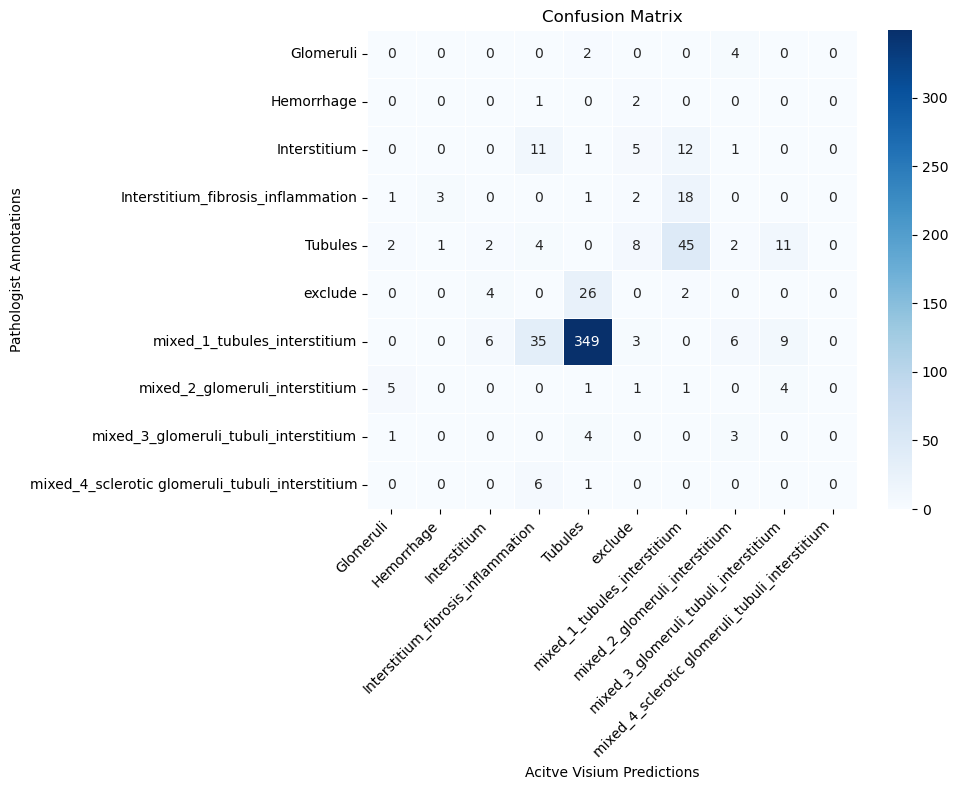

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the same labels are used in both ground truth and predictions
common_labels = sorted(set(merged_df['Current Pathologist Annotations'].dropna()).union(
                        set(merged_df['Model Prediction'].dropna())))

# Compute the confusion matrix
cm = confusion_matrix(merged_df['Current Pathologist Annotations'].fillna("Missing"),
                      merged_df['Model Prediction'].fillna("Missing"),
                      labels=common_labels)

# Convert confusion matrix to a DataFrame for visualization
cm_df = pd.DataFrame(cm, index=common_labels, columns=common_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap="Blues", linewidths=0.5)
plt.xlabel("Acitve Visium Predictions")
plt.ylabel("Pathologist Annotations")
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
# ensure the plot is not cut off
plt.tight_layout()
# save the plot
plt.savefig(working_dir + 'confusion_matrix_AV_vs_Pathologist.png')
plt.show()


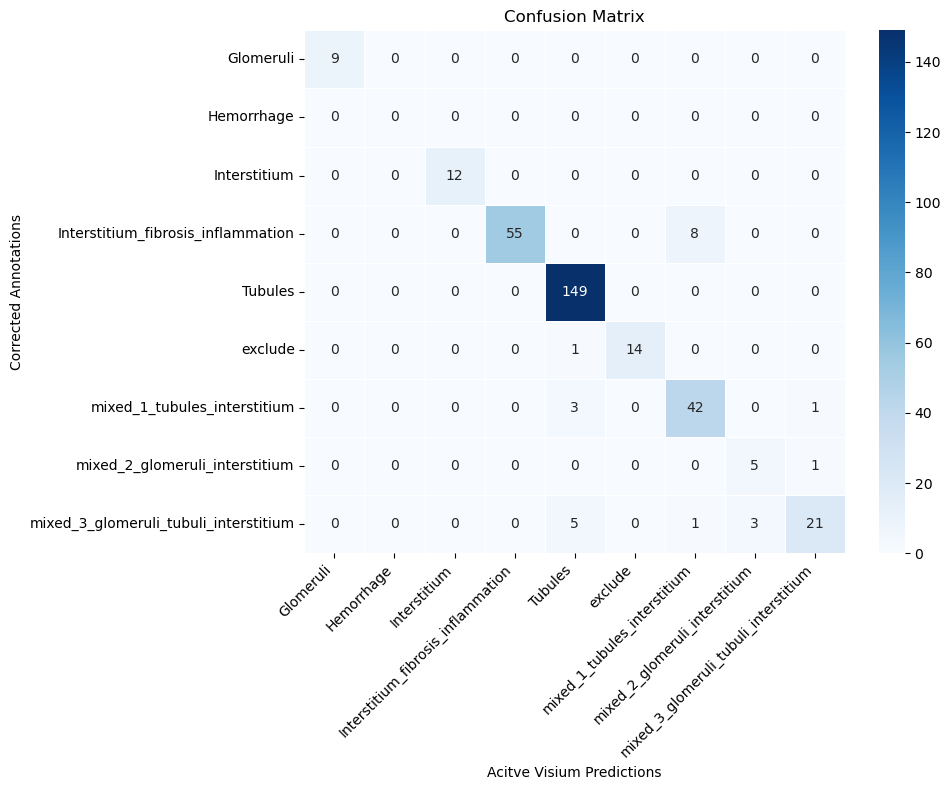

In [20]:
# Ensure the same labels are used in both ground truth and predictions
common_labels = sorted(set(merged_df['New Annotation'].dropna()).union(
                        set(merged_df['Model Prediction'].dropna())))

# Compute the confusion matrix
cm = confusion_matrix(merged_df['New Annotation'].fillna("Missing"),
                      merged_df['Model Prediction'].fillna("Missing"),
                      labels=common_labels)

# Convert confusion matrix to a DataFrame for visualization
cm_df = pd.DataFrame(cm, index=common_labels, columns=common_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap="Blues", linewidths=0.5)
plt.xlabel("Acitve Visium Predictions")
plt.ylabel("Corrected Annotations")
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
# ensure the plot is not cut off
plt.tight_layout()
plt.savefig(working_dir + 'confusion_matrix_AV_vs_Corrected.png')
plt.show()
